Load and Inspect the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

file_path = r"C:\Users\dileb\Downloads\Project4\Team_BioByte\GSE139495_Single_cell_metaData_10252019.tsv\GSE139495_Single_cell_metaData_10252019.tsv"
df = pd.read_csv(file_path, sep='\t')

# Display the first 10 rows of the DataFrame
df.head(15)


,cells,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,alra_snn_res.0.5,seurat_clusters,samples
0,ACAGCTAAGGGTTCCC,Unfiltered_control,7,4,0.000000,9,9,Unfiltered_control
1,ACATACGTCATTTGGG,Unfiltered_control,7,7,0.036010,9,9,Unfiltered_control
2,ACATCAGAGTCGTACT,Unfiltered_control,11,6,0.000000,9,9,Unfiltered_control
3,AGAGTGGGTGCAACTT,Unfiltered_control,7,4,0.150754,9,9,Unfiltered_control
4,AGGCCACGTTCGCGAC,Unfiltered_control,9,2,0.000000,9,9,Unfiltered_control
5,AGTGGGACATCCGGGT,Unfiltered_control,9,4,0.000000,9,9,Unfiltered_control
6,ATCACGAGTCCAGTTA,Unfiltered_control,8,8,0.000000,9,9,Unfiltered_control
7,ATCATGGGTCCGACGT,3,9,8,0.000000,9,9,Filtered_samples
8,ATTACTCCAGATCTGT,Unfiltered_control,12,5,0.000000,9,9,Unfiltered_control
9,CAAGATCGTCCATCCT,3,13,5,0.000000,9,9,Filtered_samples


In [2]:
# Display basic information about the DataFrame
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cells             12330 non-null  object 
 1   orig.ident        12330 non-null  object 
 2   nCount_RNA        12330 non-null  int64  
 3   nFeature_RNA      12330 non-null  int64  
 4   percent.mt        12330 non-null  float64
 5   alra_snn_res.0.5  12330 non-null  int64  
 6   seurat_clusters   12330 non-null  int64  
 7   samples           12330 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 770.8+ KB
None


In [3]:
# Display summary statistics
print(df.describe())

         nCount_RNA  nFeature_RNA    percent.mt  alra_snn_res.0.5  \
count  12330.000000  12330.000000  12330.000000      12330.000000   
mean    3735.571127   1144.335766      2.766584          3.166423   
std     2443.691446    547.261865      1.229842          3.327995   
min        5.000000      1.000000      0.000000          0.000000   
25%     2245.000000    754.000000      1.933967          0.000000   
50%     3386.000000   1117.000000      2.564431          2.000000   
75%     4524.000000   1393.750000      3.422168          5.000000   
max    44569.000000   5041.000000      7.496464         14.000000   

       seurat_clusters  
count     12330.000000  
mean          3.166423  
std           3.327995  
min           0.000000  
25%           0.000000  
50%           2.000000  
75%           5.000000  
max          14.000000  


In [4]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 cells               0
orig.ident          0
nCount_RNA          0
nFeature_RNA        0
percent.mt          0
alra_snn_res.0.5    0
seurat_clusters     0
samples             0
dtype: int64


Data Visualization

Text(0.5, 1.0, 'Distribution of nCount_RNA')

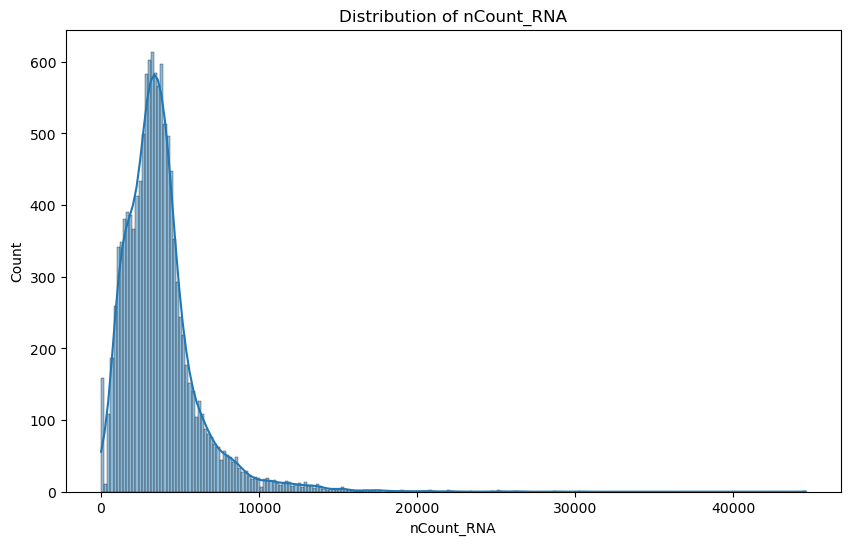

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['nCount_RNA'], kde=True)
plt.title('Distribution of nCount_RNA')

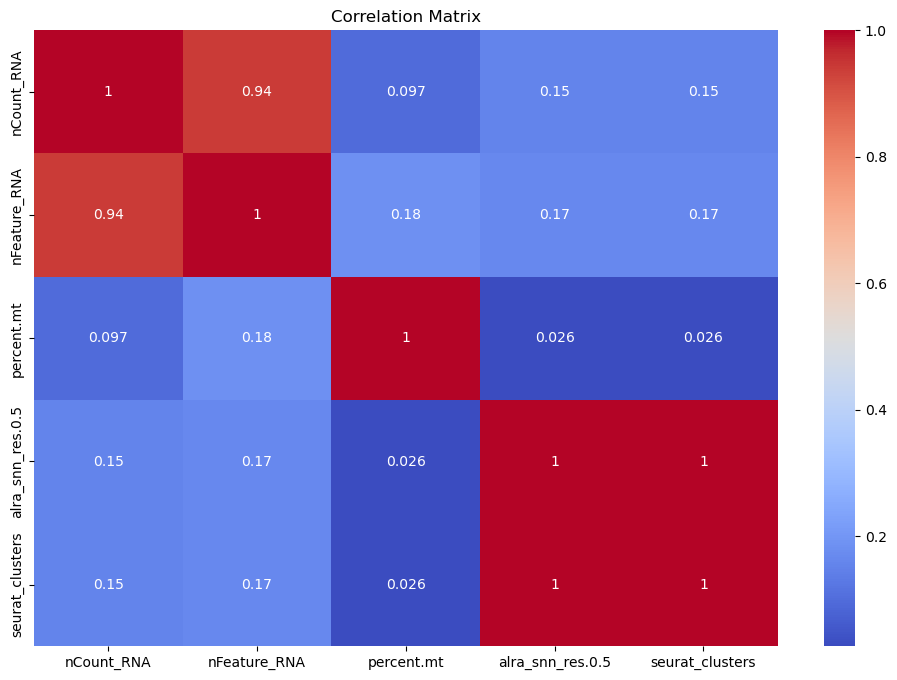

In [6]:
# Select only numeric columns
df = df.select_dtypes(include=[float, int])

# Plot a correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Splitting the Data

In [7]:
from sklearn.model_selection import train_test_split
# Prepare features and labels
X = df.drop('nCount_RNA', axis=1)
y = df['nFeature_RNA']

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

LogisticRegression

In [8]:
# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\dileb\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Training & Evaluation

In [9]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         2
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         2
          20       0.00      0.00      0.00         2
          43   

c:\Users\dileb\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\dileb\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dileb\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no 

Elbow Method

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [11]:
# Create lists to store inertia values and the corresponding values of k
inertia_values = []
k_values = range(1, 11)

In [12]:
# Create a for-loop to evaluate each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

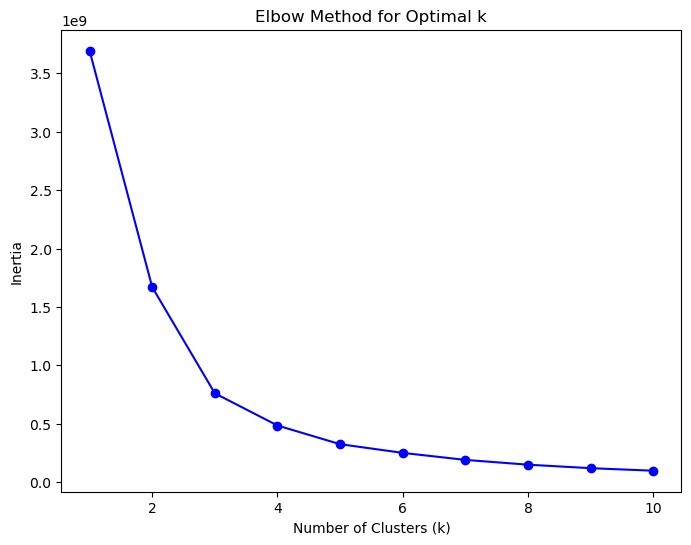

In [13]:
# Plot the results to create the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

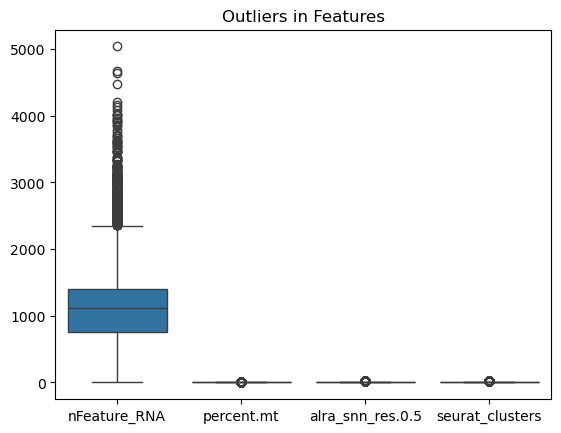

In [13]:
# Check for outliers using boxplot
sns.boxplot(data=df.drop(columns=['nCount_RNA'])) 
plt.title("Outliers in Features")
plt.show()

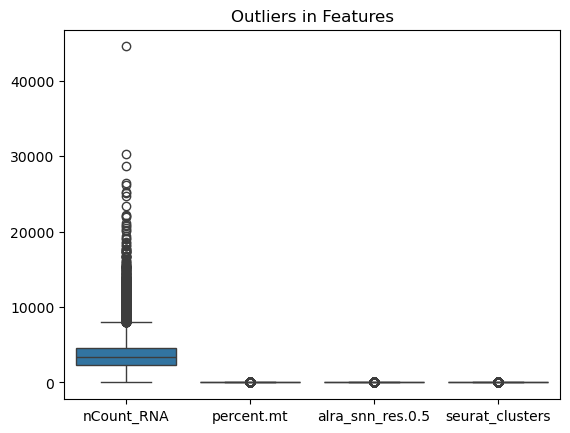

In [14]:
# Check for outliers using boxplot
sns.boxplot(data=df.drop(columns=['nFeature_RNA']))  
plt.title("Outliers in Features")
plt.show()

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = r"C:\Users\dileb\Downloads\Project4\Team_BioByte\final_clean_df (1)"
df = pd.read_csv(file_path, sep='\t')


In [16]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


# Train Logistic Regression Model
logreg = LogisticRegression(max_iter=500)
logreg.fit(X_train, y_train)

# Predict and Evaluate
y_pred = logreg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.0024330900243309003

Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.29      1.00      0.44         2
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         5
           8       0.38      1.00      0.55         3
          10       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         2
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         2
          20       0.00      0.00      0.00         2
          43       0.00      0.00      0.00         1
         106       0.00      0.00      0.00         1
         209       0.00 

c:\Users\dileb\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\dileb\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dileb\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no 

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [18]:
# Create lists to store inertia values and the corresponding values of k
inertia_values = []
k_values = range(1, 11)

In [19]:
# Create a for-loop to evaluate each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

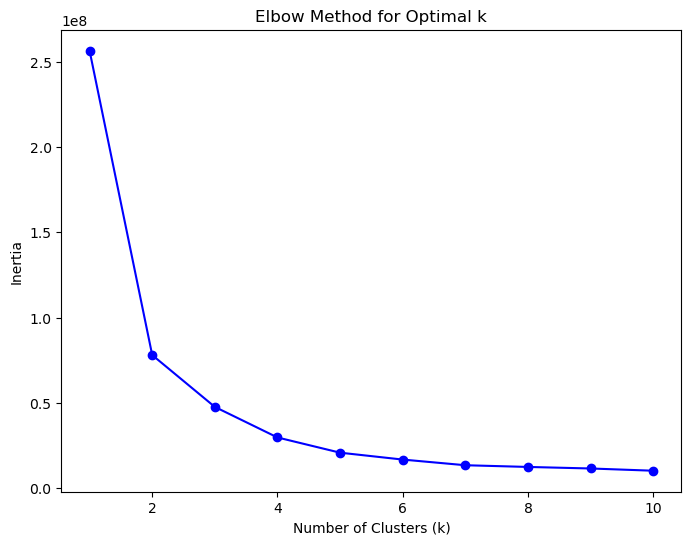

In [ ]:
# Plot the results to create the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()